# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 6: Model Selection and Cross-validation [ __ /100 marks]


In this assignment we will examine ["Forest Fires"](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) dataset to predict the burned area of forest fires giving some features. We will apply model selection and cross-validation method we learned.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
np.set_printoptions(precision=3)
seed=0


## Question 1.0 [ _ /6 marks]

Read the file `forestfires.csv` into a dataframe. Display the first 5 rows of this dataframe. 

In [2]:
# Read forestfires.csv into a dataframe [ /1 marks] 
df = pd.read_csv('forestfires.csv')

# Display the first 5 rows of the dataframe [ /1 marks]
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Inspect the data types of the attributes in the data frame and answer the question in the next cell
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


 **Questions**:
 1. How many rows are there?  [ /1 marks]
 2. Does the data consist of any null entries? [ /1 marks]
 3. What categorical attributes do you see? [ /2 marks]
 
**Your answer**:
1. There are 517 rows in the dataset.
2. There are no null entries in the dataset.
3. Month and Day are categorical attributes as they are object types.

## Question 1.1 [ _ /15 marks]

Using a threshold of statistical significance of 5%, check statistical significance for the labels of each categorical attribute. Group insignificant labels into two new statistically significant classes.

In [4]:
# Check statistical significance of the labels in categorical attribute 1. [ /3 marks]
count = df['month'].value_counts()
print(count)
print(count/len(df)*100)

# there are 8 labels that are statistically insignificant in the month attribute


month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64
month
aug    35.589942
sep    33.268859
mar    10.444874
jul     6.189555
feb     3.868472
jun     3.288201
oct     2.901354
apr     1.740812
dec     1.740812
jan     0.386847
may     0.386847
nov     0.193424
Name: count, dtype: float64


In [5]:
# Check statistical significance of labels in categorical attribute 2. [ /3 marks]
count = df['day'].value_counts()
print(count)
print(count/len(df)*100)

# all labels in this attribute are statistically significant


day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64
day
sun    18.375242
fri    16.441006
sat    16.247582
mon    14.313346
tue    12.379110
thu    11.798839
wed    10.444874
Name: count, dtype: float64


In [6]:
# Group insignificant labels into two new statistically significant labels. [ /8 marks]
df['month'] = df['month'].replace(['nov', 'dec', 'jan', 'feb'], 'winter')
df['month'] = df['month'].replace(['apr', 'may', 'jun', 'oct'], 'summer')


In [7]:
# Recheck statistical significance of the attribute with adjusted labels [ /1 marks]
count = df['month'].value_counts()
print(count)
print(count/len(df)*100)

# now all labels for cat attribute 1 and 2 are statistically significant with any label having at least 5% of the data for each attribute


month
aug       184
sep       172
mar        54
summer     43
jul        32
winter     32
Name: count, dtype: int64
month
aug       35.589942
sep       33.268859
mar       10.444874
summer     8.317215
jul        6.189555
winter     6.189555
Name: count, dtype: float64


## Question 1.2 [ _ /4 marks]

Let's convert all categorical data into numerical data using `get_dummies`. Display the first 5 rows of your new dataframe.

In [8]:
# Use "get_dummies" to perform one hot encoding to the categorical attributes [ /3 marks]
df = pd.get_dummies(df, drop_first=True)

# Display first 5 rows of the data frame [ /1 mark]
df.head()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_mar,month_sep,month_summer,month_winter,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,True,False,False,False,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,True,False,False,False,False,False,False,False,False,False
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,True,False,False,False,False,False,True,False,False,False


In [9]:
# The .head() in the previous cell might give a truncated view. You can see all columns names using: 
df.columns


Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_jul', 'month_mar', 'month_sep', 'month_summer',
       'month_winter', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

## Question 1.3 [ _ /8 marks]

Let's examine the distribution of the target variable "area".

/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


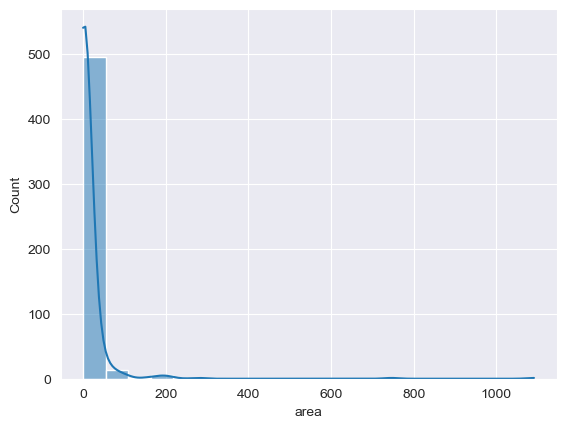

In [10]:
# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
sns.set_style('darkgrid')
sns.histplot(df['area'], bins=20, kde=True)
plt.show()


 **Question**:
 
 Describe the distribution of the target variable. We will use log transform on it, explain why would it help. [ /3 mark]

**Your answer**:

The distribution of the area target variable for wildfires is extremely right skewed and the majority of data points seem to be under 100 in area units with some outliers tailing off to higher area values. Using a log transformation for the area value which we are predicting will allow wildfires that are outliers for the area attribute be represented in training so that our model will not over fit to the majority of fires under 200 area and will be able to capture the patterns for the outlier wildfires with larger areas as well. This will lead to better generalization.

/Users/parm/anaconda3/envs/DSenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


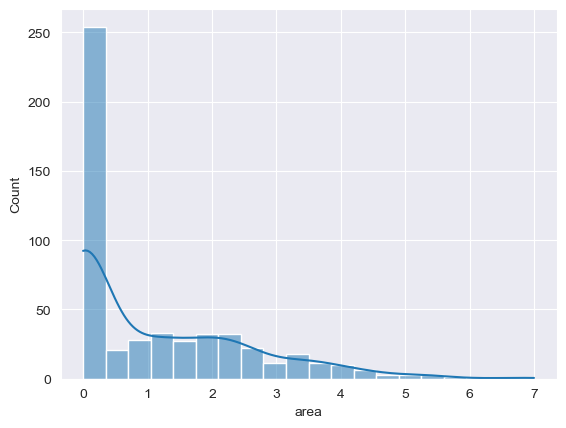

In [11]:
# Use np.log to transform "area". [ /3 mark]
# Note that log is not defined every where and you might need to do something about it.

df['area'] = np.log(df['area']+1)       # adding 1 to area values to avoid log(area = 0) which is undefined

# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
sns.histplot(df['area'], bins=20, kde=True)
plt.show()


## Question 1.4 [ _ /6 marks]

Let's use **mean squared error** as our score metric. We can use `sklearn.metrics.mean_squared_error`, but here let's write our own function called `mse` with arguments `y` and `ypr`(predicted y) which returns the mean squared error. Recall the formula for MSE below:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}  \left( \hat{y_{i}}-y_{i}\right)^{2} $$

In [12]:
# Define a function that takes in y's and returns MSE [ /6 marks]
def mse(ypr, y):
    return np.mean((ypr-y)**2)


## Question 1.5 [ _ /4 marks]

We will use all available features as predictors, and use the log transformed "area" as target variable. Then let's split our data into training and test. As usual, let's use test_size=0.2 and random_state=seed.

In [13]:
# Create X and y [ /2 marks]
X = df.drop('area', axis=1)
y = df['area']

# Use train_test_split on X, y [ /2 marks]
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.2, random_state=seed)


## Question 1.6 [ _ / 6 marks]

For our first model, create a pipeline called "M1" that performs only a linear regression. 

In [14]:
# Create a pipeline for model 1 (M1) [ /6 marks]
M1 = Pipeline([
    ('lin_reg', LinearRegression())
])


## Question 1.7 [ _ / 8 marks]

For our second model let's add quadratic terms for all features (use `PolynomialFeatures`). Create a model pipeline for our second model (M2).

In [15]:
# Create a pipeline for model 2 (M2) [ / 8 marks]
M2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), 
    ('lin_reg', LinearRegression())
])


## Question 1.8 [ _ / 18 marks]

`Temperature (temp)` and `Rain (rain)` may be important features, so let's extend model 1 by adding a *cubed* term for temp and a *squared* term for rain. Before creating a pipeline for this model, we need a custom transformer: we can specify a column for squared rain and one for cubed temp. The transformer has been initialized below, but you'll need to complete it with adding 1 or 2 lines of code. After this, create your corresponding pipeline (M3).

In [16]:
# Modify the transform method of the KeyFeatures class [ /10 marks]
class KeyFeatures(BaseEstimator, TransformerMixin):

    def fit (self, X, y=None):
        return self

    def transform (self, X, y=None):
        X = X.assign(temp_cubed = X.temp ** 3)
        X = X.assign(rain_squared = X.rain ** 2)
        return X

# Create a pipeline for model 3 (M3) [ /8 marks]
M3 = Pipeline([
    ('key_features', KeyFeatures()),
    ('lin_reg', LinearRegression())
])


## Question 1.9 [ _ /8 marks]

For models 1-3, use 4-fold Cross-validation and report the mean and std of the loss (i.e., the `mse` function you created for Q1.4). For the cross-validation part, use `from sklearn.metrics import make_scorer` to make a scorer out of your `mse` function.

In [17]:
# Use 4-fold CV on all models to get mean and std of score [ /8 marks]

# scoring function using mse function
scorer = make_scorer(mse)

# cross validation
cvsc1 = cross_val_score(M1, xTrain, yTrain, cv=4, scoring=scorer)
cvsc2 = cross_val_score(M2, xTrain, yTrain, cv=4, scoring=scorer)
cvsc3 = cross_val_score(M3, xTrain, yTrain, cv=4, scoring=scorer)

print(f"M1 loss: %.4f +/- %.4f" % (cvsc1.mean(), cvsc1.std()))
print(f"M2 loss: %.4f +/- %.4f" % (cvsc2.mean(), cvsc2.std()))
print(f"M3 loss: %.4f +/- %.4f" % (cvsc3.mean(), cvsc3.std()))


M1 loss: 1.9556 +/- 0.1531
M2 loss: 112.1476 +/- 60.9670
M3 loss: 18.2312 +/- 27.9257


## Question 2.0 [ _ / 3 marks]

**Question**: 

Which model would you choose and why? [ /3 marks]

**Your answer**:

I would choose model 1 because it has the lowest MSE mean and lowest complexity and the std deviation would not alter the ranking.


## Question 2.1 [ _ /  6 marks]

Estimate the performance of your chosen model on the test data (which has been held out) using `mse`. 

In [18]:
# Compute the test loss on the unseen (test) dataset [ /6 marks]

# estimate the performance of M1 on the test data using mse
M1.fit(xTrain, yTrain)
yPred = M1.predict(xTest)

print('MSE Loss on test data:', mse(yPred, yTest))


MSE Loss on test data: 2.5081846064218385


## Question 2.2 [ _ /8 marks]

Recap: The central limit theorem (CLT) states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually greater than 30).

Compute (and print) a 95% confidence interval for the average test error using the Central Limit Theorem. You can use the following formula to compute it: 

$$ \bar{L_n} \pm 1.96 * \frac{\sigma_{l}}{\sqrt{n}}$$

Here $\bar{L_n}$ is the average test loss (i.e. for our test set), $\sigma_l$ is the standard deviation (of our test losses), and $n$ is the total number of test losses we compute.  

In [19]:
# Test loss here is a point estimate (statistic) for the generalization error
# Having >30 samples, we can use the formula above safely
# Here we compute confidence interval for generalization error (i.e.expected [average] test loss for this particular dataset)

# Calculate the 95% Confidence Interval for average test loss [ /8 marks]
n = len(yTest)
se = np.sqrt(np.var(yTest)/n)
ci = [mse(yPred, yTest) - 1.96*se, mse(yPred, yTest) + 1.96*se]

print('Confidence Interval is:', ci)


Confidence Interval is: [2.2099686758305452, 2.8064005370131317]


# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.